Suppose $ dS_t = S_t\mu dt + S_t\sigma dW_t $ - Geometric Brownian Motion

$ i.e. k = S_t $ in our formulas

For Uniswap v2 without fee, as we know:

$ V_1 = n\sqrt{k}L\sqrt[n]{\prod\limits_{i=2}^{n} P_{x_1x_i}} $

$ V_{held} = (k + (n-2)\sqrt{k} + 1)L\sqrt[n]{\prod\limits_{i=2}^{n} P_{x_1x_i}} $

$ S_t = S_0e^{((\mu - \frac{\sigma^2}{2})t + \sigma W_t)}, S_0 = 1 $

$ ES_t = e^{\mu t} $

$ d\sqrt{S_t} = (\frac{\partial \sqrt{S_t}}{\partial t} + S_t\mu \frac{\partial \sqrt{S_t}}{\partial S_t} + (\sigma S_t)^2\frac{\partial ^2 \sqrt{S_t}}{\partial S_t^2})dt + S_t\sigma \frac{\partial \sqrt{S_t}}{\partial S_t} dW_t $ according to Ito's lemma

$ d\sqrt{S_t} = \sqrt{S_t}(\frac{\mu}{2} - \frac {\sigma^2}{8})dt + \sqrt{S_t}\frac{\sigma}{2}dW_t $

$ \sqrt{S_t} = \sqrt{S_0}e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t + \frac{\sigma}{2}W_t]} $

$ E \sqrt{S_t}  = \sqrt{S_0}e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t]} = e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t]}$

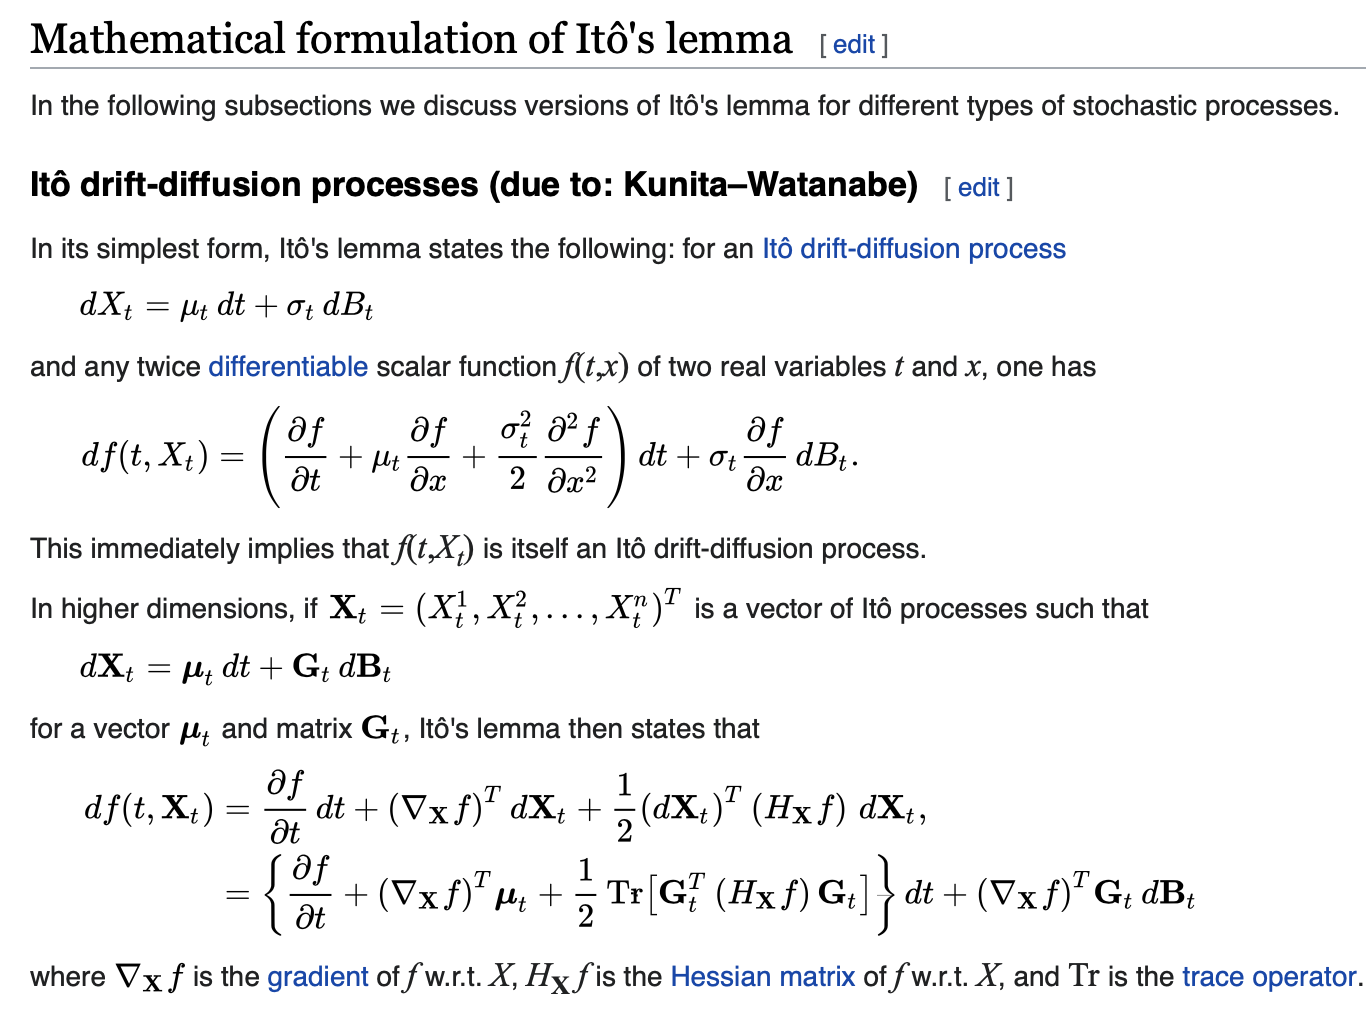

$ EV_1 = nL\sqrt[n]{\prod\limits_{i=2}^{n} P_{x_1x_i}}e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t]} $

$ EV_{held} = L\sqrt[n]{\prod\limits_{i=2}^{n} P_{x_1x_i}}(e^{\mu t} + (n-2)e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t]} + 1) $

$EIL = E(\frac{V_1}{V_{held}}) - 1 = proof??? = \frac{ne^{-\frac{\sigma^2 t}{8}}}{(n-2)e^{-\frac{\sigma^2 t}{8}} + 2ch(\frac{\mu t}{2})} - 1 $

In [175]:
donttouch = np.zeros(n)

In [176]:
donttouch = EIL

In [190]:
frame = pd.DataFrame({'eil': donttouch})

In [191]:
frame.to_csv('EIl_vol.csv', index = False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [3]:
def EIL_uni2(n, t, m, s):
    volume24h = 1/30   #объем торгов / кол-во актива
    nom = math.exp((m/2 - (s**2)/8)*t +(s**2)*t*0/6) + 0*volume24h * (s / 10) * t  #s/10 - комиссия 1%
    denom = (n-2)*math.exp((m/2 - (s**2)/8)*t) + math.exp(m*t) + 1
    nom*=n
    return (nom/denom) - 1

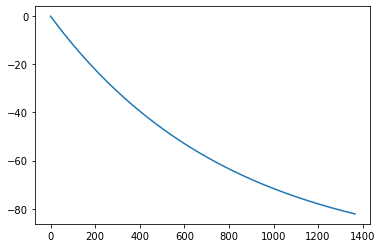

In [4]:
N = 2
m = 0.1/365
s = 0.1

t = np.linspace(0, 1365, 1366)
tmp = np.zeros(np.size(t))

for i in range(np.size(t)):
    tmp[i] = EIL_uni2(N, t[i], m, s)
    
plt.plot(t, tmp*100)
plt.show()

In [5]:
def EV_uni2(n, L, m, s, t, P, flag):
    prod = 1
    for i in range(n):
        prod *= P[i]
    V1 = n*(L*math.pow(prod, (1/n)))*math.exp((m/2 - (s**2)/8)*t + (s**2)*t/6)
    Vh = L*math.pow(prod, (1/n))*((n-2)*math.exp((m/2 - (s**2)/8)*t) + math.exp(m*t) + 1)
    if flag == 0: return Vh
    else: return V1

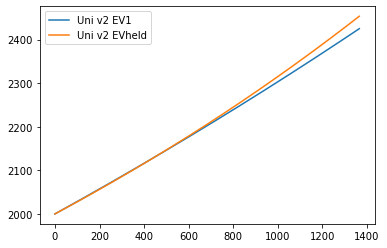

In [6]:
n = 2
L = 1000
m = 0.1/365
s = 0.01
t = np.linspace(0, 1365, 1000)
P = [1,1]

tmp = np.zeros(np.size(t))
tmp1 = np.zeros(np.size(t))
tmp2 = np.zeros(np.size(t))

for i in range(np.size(t)):
    tmp[i] = EV_uni2(n, L, m, s, t[i], P, 1)
    tmp1[i] = EV_uni2(n, L, m, s, t[i], P, 0)
    tmp2[i] = EV_uni2(n, L, m, s, t[i], P, 1) / EV_uni2(n, L, m, s, t[i], P, 0) - 1
    
plt.plot(t, tmp, label = 'Uni v2 EV1')
plt.plot(t, tmp1, label = 'Uni v2 EVheld')
#plt.plot(t, tmp2, label = 'Uni v2 EV')
plt.legend()
plt.show()

In [7]:
def V_price_uni2(n, L, m, s, t, P, flag, z):
    prod = 1
    for i in range(n):
        prod *= P[i]
    V1 = n*L*math.pow(prod, (1/n))*math.exp((m/2 -((s**2)/8))*t + s*z/2 + (s**2)*t/6)
    Vh = L*math.pow(prod, (1/n))*((n-2)*math.exp((m/2 -((s**2)/8))*t + s*z/2) + math.exp((m -((s**2)/2))*t + s*z) + 1)
    if flag == 0: return Vh
    else: return V1

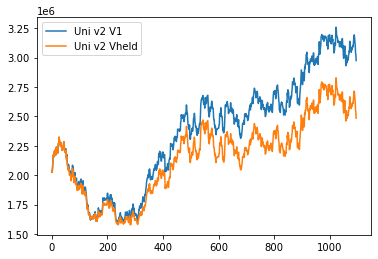

In [8]:
n = 2
L = 1000000
m = 0.01/365
s = 0.025
t = np.linspace(0, 365*3, 1000)
P = [1,1]

tmp = np.zeros(np.size(t))
tmp1 = np.zeros(np.size(t))

m1 = 0
s1 = 1
q = np.random.normal(m1, np.sqrt(s1), np.size(t))
z = np.cumsum(q)*np.sqrt(s1)


for i in range(np.size(t)):
    tmp[i] = V_price_uni2(n, L, m, s, t[i], P, 1, z[i])
    tmp1[i] = V_price_uni2(n, L, m, s, t[i], P, 0, z[i])
    
plt.plot(t, tmp, label = 'Uni v2 V1')
plt.plot(t, tmp1, label = 'Uni v2 Vheld')
plt.legend()
plt.show()

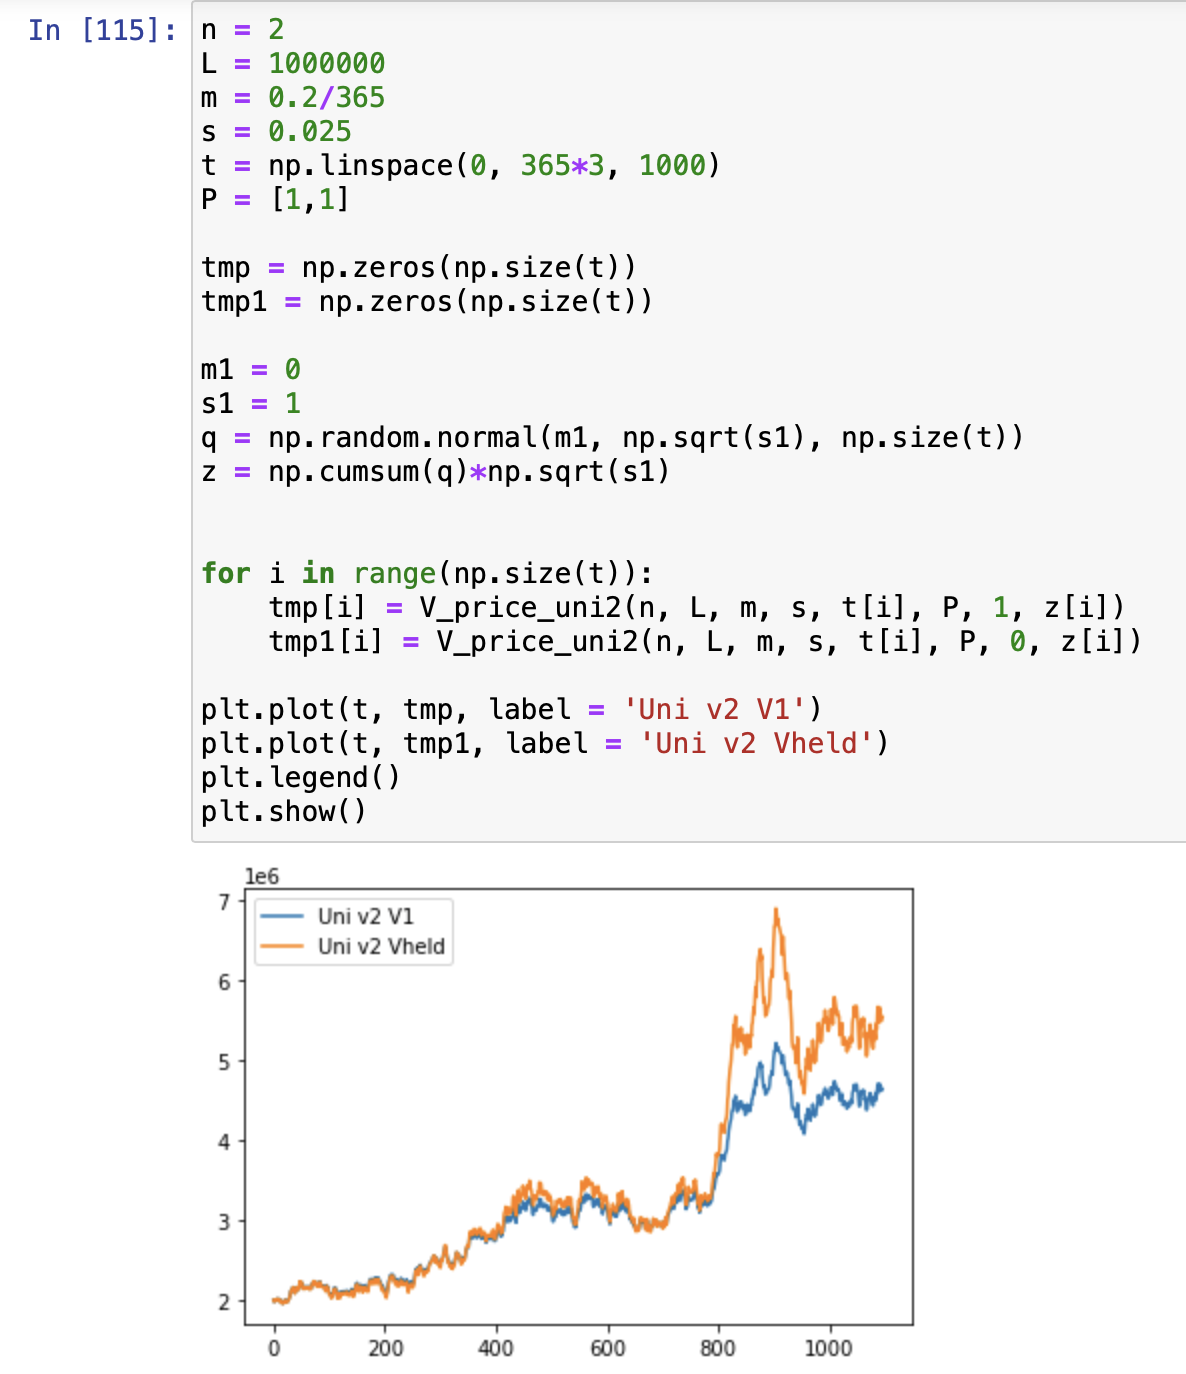

For Balancer without fee:

$IL(k, w_1, ..., w_n) = \frac{k^{\frac{w_j}{w_i + w_j}}}{\sum\limits_{l = 1, l\neq i, j}^{n} w_lk^{\frac{w_j}{w_i + w_j}} + w_i + w_jk} - 1$

Let $\frac{w_j}{w_i + w_j} = a, i < j$

$ES^a = e^{(\mu a + \frac{\sigma^2 a(a-1)}{2})t} $

$EIL = \frac{e^{(\frac{\mu w_j}{w_i + w_j} - \frac{\sigma^2 w_iw_j}{2(w_i + w_j)^2})t}}{w_i + w_je^{\mu t} + \sum\limits_{l = 1, l\neq i, j}^{n} w_l e^{(\frac{\mu w_j}{w_i + w_j} - \frac{\sigma^2 w_iw_j}{2(w_i + w_j)^2})t}} - 1$

In [9]:
def EIL_balancer(n, w, t, m, s, i, j):
    a = w[j]/(w[j] + w[i])
    aa = -(w[i]*w[j])/((w[i]+w[j])**2)
    
    summa = 0
    for l in range(n):
        if (l!=i)&(l!=j):
            summa += w[l]
            
    Pow = (m*a + ((s**2)*aa)/2)*t
    
    nom = math.exp(Pow + (s**2)*t/6)
    denom = w[i] + w[j]*math.exp(m*t) + nom*summa
    
    return (nom/denom) - 1

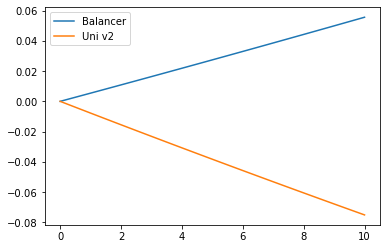

In [10]:
n = 2
m = 0.3/365
s = 0.25

w = np.zeros(n)
w[0] = 0.2
w[1] = 1 - w[0]

t = np.linspace(0, 10, 100)
tmp = np.zeros(np.size(t))
tmp1 = np.zeros(np.size(t))
for i in range(np.size(t)):
    tmp[i] = EIL_balancer(n, w, t[i], m, s, 0, 1)
    tmp1[i] = EIL_uni2(n, t[i], m, s)
    
plt.plot(t, tmp, label = 'Balancer')
plt.plot(t, tmp1, label = 'Uni v2')
plt.legend()
plt.show()

In [11]:
def V_price_bal(n, L, m, s, t, P, flag, z, w, i, j):
    a = w[j]/(w[j] + w[i])
    aa = -(w[i]*w[j])/((w[i]+w[j])**2)
    
    summa = 0
    for l in range(n):
        if (l!=i)&(l!=j):
            summa += w[l]
            
    Pow = (m*a + ((s**2)*aa)/2)*t + a*s*z
    
    nom = (L**(1/(w[i] + w[j]))) * math.exp(Pow + (s**2)*t/6) *((w[j]/w[i])**a)
    denom = (L**(1/(w[i] + w[j])))*((w[j]/w[i])**a)*(w[i] + w[j]*math.exp((m - (s**2)/2)*t + a*z*s) + 0*nom*summa)
    if flag == 0: return denom
    else: return nom

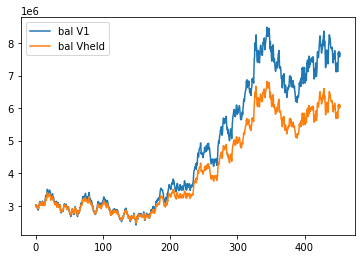

In [12]:
n = 2
L = 1000000
m = 0.2/365
s = 0.025
t = np.linspace(0, 453, 1000)
P = [1,1]

tmp = np.zeros(np.size(t))
tmp1 = np.zeros(np.size(t))
w = np.zeros(n)
w[0] = 0.2
w[1] = 1- w[0]

m1 = 0
s1 = 1
q = np.random.normal(m1, np.sqrt(s1), np.size(t))
z = np.cumsum(q)*np.sqrt(s1)


for i in range(np.size(t)):
    tmp[i] = V_price_bal(n, L, m, s, t[i], P, 1, z[i], w, 0, 1)
    tmp1[i] = V_price_bal(n, L, m, s, t[i], P, 0, z[i], w, 0, 1)
    
plt.plot(t, tmp, label = 'bal V1')
plt.plot(t, tmp1, label = 'bal Vheld')
plt.legend()
plt.show()

For Uniswap v3 without fee:

$IL(n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{n\sqrt{k} - ((n-2)\sqrt{k} + k +1)}{ ((n-2)\sqrt{k} + k +1) - \frac{\sqrt{k}(\frac{c_1}{\sqrt{k}} + \sum\limits_{l = 2, l \neq j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j)}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}} }}$

Simplify:

$IL(n, c_1, ... c_n, P_{x_1x_2},..., P_{x_1x_n}, k) = \frac{(2\sqrt{k} - k - 1)}{\sqrt{k}(n-2-\frac{\sum\limits_{l = 1, l \neq i,j}^{n}P_{x_1x_l}c_l}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}) + k(1 - \frac{P_{x_1x_j}c_j}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}) +(1 - \frac{P_{x_1x_i}c_i}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}})}$

$ EIL = \frac{2e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t]} - e^{\mu t} - 1}{e^{[(\frac{\mu}{2} - \frac {\sigma^2}{8})t]}(n-2-\frac{\sum\limits_{l = 1, l \neq i,j}^{n}P_{x_1x_l}c_l}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}) + e^{\mu t}(1 - \frac{P_{x_1x_j}c_j}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}) + (1 - \frac{P_{x_1x_i}c_i}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}})} $

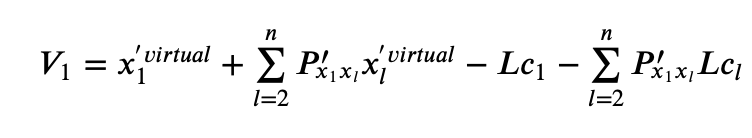

$ V_1 = x_1^{virtual}(n-2) + \frac{P_{x_1x_i}}{\sqrt{k}}(\frac{x_i^{virtual}x_j^{virtual}}{c_jL}) + P_{x_1x_j}\sqrt{k}c_jL - \sum\limits_{l = 1, l\neq i, j}Lc_lP_{x_1x_l} - \frac{P_{x_1x_i}}{\sqrt{k}}c_iL - \sqrt{k}P_{x_1x_j}c_jL $

$ x_i^{virtual} = \frac{x_1^{virtual}}{P_{x_1x_i}} $

$ x_j^{virtual} = \frac{x_1^{virtual}}{P_{x_1x_j}} $

$ V_1 = x_1^{virtual}(n-2) + \frac{1}{P_{x_1x_j}\sqrt{k}}(\frac{x_1^{virtual}x_1^{virtual}}{c_jL}) + P_{x_1x_j}\sqrt{k}c_jL - \sum\limits_{l = 1, l\neq i, j}Lc_lP_{x_1x_l} - \frac{P_{x_1x_i}}{\sqrt{k}}c_iL - \sqrt{k}P_{x_1x_j}c_jL $

$ V_1 = x_1^{virtual}(n-2) + \frac{1}{P_{x_1x_j}\sqrt{k}}(\frac{x_1^{virtual}x_1^{virtual}}{c_jL}) - \sum\limits_{l = 1, l\neq i, j}Lc_lP_{x_1x_l} - \frac{P_{x_1x_i}}{\sqrt{k}}c_iL $

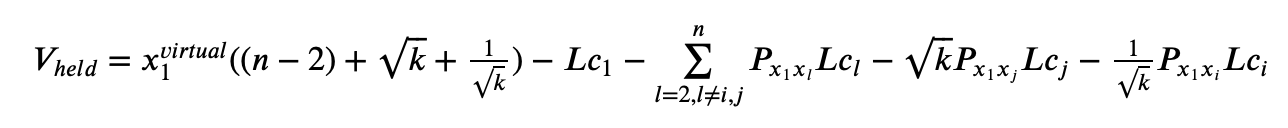

$ V_1 - V_{held} = \frac{1}{P_{x_1x_j}\sqrt{k}}(\frac{x_1^{virtual}x_1^{virtual}}{c_jL})- x_1^{virtual}(\sqrt{k} + \frac{1}{\sqrt{k}}) + \sqrt{k}P_{x_1x_j}c_jL$

$ \frac{V_1 - V_{held}}{x_1^{virtual}} = \frac{1}{P_{x_1x_j}\sqrt{k}}(\frac{x_1^{virtual}}{c_jL})- \sqrt{k} - \frac{1}{\sqrt{k}} + \frac{\sqrt{k}P_{x_1x_j}c_jL}{x_1^{virtual}}$

$ x_1^{virtual} = L\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}$

$ \frac{\sqrt{k}(V_1 - V_{held})}{x_1^{virtual}} = \frac{1}{P_{x_1x_j}}(\frac{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}{c_j})- k - 1 + \frac{kP_{x_1x_j}c_j}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}$

$IL = \frac{\frac{1}{P_{x_1x_j}}(\frac{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}{c_j})- k - 1 + \frac{kP_{x_1x_j}c_j}{\sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}}}}{ ((n-2)\sqrt{k} + k +1) - \frac{ \sqrt{k}(\frac{c_1}{\sqrt{k}} + \sum\limits_{l = 2, l \neq j}^{n}P_{x_1x_l}c_l + \sqrt{k}P_{x_1x_j}c_j) }{ \sqrt[n]{\prod\limits_{l=2}^{n}P_{x_1x_l}} }   }$

In [13]:
def EIL_uni3(n, c, P, t, m, s, i, j, z):  #z-wiener
    
    prod = 1
    summa = 0
    
    for l in range(n):
        prod *= P[l]
        
        if (l!=i)&(l!=j):
            summa += P[l]*c[l]
            
    Pow = ((m/2) - (s**2)/8)*t
    prod = math.pow(prod, (1/n))
    k=math.exp(m*t)

    if ((prod/c[j])**2) < k:   #вышло из границ
        nom = - (math.exp(m*t)) - 1 + (math.exp(m*t - (s**2)*t*2.7/10))*P[j]*c[j]/prod + prod/(P[j]*c[j])
    else: 
        nom = 2*math.exp(Pow) - math.exp(m*t) - 1
        
    denom = (math.exp(Pow))*(n - 2 - (summa/prod))
    denom += (math.exp(m*t))*(1 - ((P[j]*c[j])/prod)) 
    denom += 1 - ((P[i]*c[i])/prod)
    
    return nom/denom

In [14]:
2*math.exp(((m/2) - (s**2)/8)*500) - math.exp(m*500) - 1

-0.10942128133579865

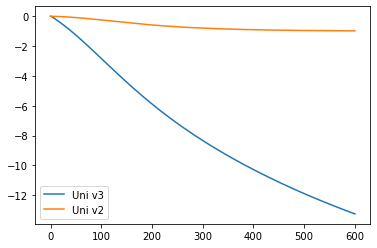

In [15]:
n = 2
m = 5/365
s = 0.075

q = np.random.normal(m, np.sqrt(s), 10000)
z = np.cumsum(q)*np.sqrt(s)
    
pa = 0.9
pb = 1.1
c = np.zeros(n)
c[0] = np.sqrt(pa)
c[1] = 1/(np.sqrt(pb))



P = np.zeros(n)
P[0] = 1
P[1] = 1

t = np.linspace(0, 600, 10000)
tmp = np.zeros(np.size(t))
tmp1 = np.zeros(np.size(t))


for i in range(np.size(t)):
    tmp[i] = EIL_uni3(n, c, P, t[i], m, s, 0, 1, z[i])
    tmp1[i] = EIL_uni2(n, t[i], m, s)
    
plt.plot(t, tmp, label = 'Uni v3')
plt.plot(t, tmp1, label = 'Uni v2')
plt.legend()
plt.show()

In [16]:
P[0]

1.0

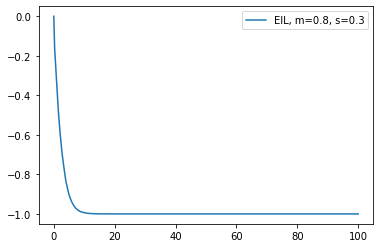

In [17]:
N=2
n=365
iterations = 1000

c= np.zeros(N)
    
pa = 0.9
pb = 1.1

c[0] = np.sqrt(pa)
c[1] = 1/(np.sqrt(pb))



m = 0.8
s = 0.3
t = np.linspace(0, 100, n)
EIL = np.zeros(n)

for j in range(iterations):

    xreal = np.zeros(n)
    yreal = np.zeros(n)
    xvirt = np.zeros(n)
    yvirt = np.zeros(n)

    P = np.zeros(n)
    P[0]= 1

    xvirt[0] = 1000
    yvirt[0]= 1000

    L = np.sqrt(xvirt[0]*yvirt[0])

    xreal[0]=xvirt[0]-L*c[0]
    yreal[0] = yvirt[0]-L*c[1]



    m1 = 0
    s1 = 1
    q = np.random.normal(m1, np.sqrt(s1), n)
    z = np.cumsum(q)*np.sqrt(s1)


    k = np.zeros(n)
    k[0] = 1
    k2 = np.zeros(n)
    k2[0] = 1

    v1 = np.zeros(n)
    v1[0] = xreal[0] + yreal[0]*P[0]
    vheld = np.zeros(n)
    vheld[0] = v1[0]

    IL = np.zeros(n)
    IL[0] = v1[0]/vheld[0] - 1

    for i in range(1,n):
        P[i] = math.exp((m -((s**2)/2))*t[i] + s*z[i])
        k = P[i]/P[i-1]

        xvirt[i] = L*np.sqrt(P[i])
        yvirt[i]=L/np.sqrt(P[i])


        if xvirt[i] < c[0]*L: 
            xvirt[i]=c[0]*L 
            yvirt[i]=L**2/xvirt[i]

        elif yvirt[i] < c[1]*L: 
            yvirt[i]=c[1]*L
            xvirt[i] = L**2/yvirt[i]


        xreal[i] = xvirt[i]-L*c[0]
        yreal[i] = yvirt[i]-L*c[1]

        v1[i]=xreal[i]+yreal[i]*P[i]
        vheld[i] = xreal[i-1]+yreal[i-1]*P[i]
        vh = xreal[0] + P[i]*yreal[0]
        IL[i] = v1[i]/vh - 1
    EIL += IL

EIL/=iterations

#plt.plot(t, P, label='P, m=%s, s=%s'%(round(m, 5), round(s, 5)))
plt.plot(t, EIL, label='EIL, m=%s, s=%s'%(round(m, 5), round(s, 5)))

#plt.plot(t, P2, label='P, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.plot(t, IL2, label='IL, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
plt.legend()

# Ожидаемый IL #

In [18]:
def trueexpect(P, pa, pb, t, m, s, t1, t2):
    a = 2*np.sqrt(P)*math.exp(((m/2) - (s**2)/8)*t) - P*math.exp(m*t)/np.sqrt(pb) - np.sqrt(pa)
    b = np.sqrt(P)*(math.exp(m*t) + 1) - P*math.exp(m*t)/np.sqrt(pb) - np.sqrt(pa)
    if t > t1:
        a = (np.sqrt(pb) - np.sqrt(pa))*(math.exp(((m/2) - (s**2)/8)*t))
    elif t < t2:
        a = P*(math.exp(-((m/2) - (s**2)/8)*t)/np.sqrt(pa) - math.exp(-((m/2) - (s**2)/8)*t)/np.sqrt(pb))
    return a/b - 1

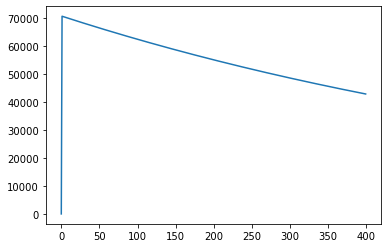

In [19]:
te = np.zeros(400)
for i in range(0, 400):
    te[i] = trueexpect(100, 0, 200000000, i, 0.1/400, 0.1, 0, 0)
plt.plot( range(0, 400), te*100)

In [20]:
def IL2_uni3fix(k,P,pa,pb, r):
    
    '''a = c1/np.sqrt(P)
    b = c2*np.sqrt(P)
    d = (1 - a) + k*(1 - b)
    
    if k < a**2:
        c = (1/a - 1)*k - (1 - a)

    elif k > 1/(b**2):
        c = (1/b - 1) - k*(1 - b)
    
    elif (k>= a**2)&(k <= 1/(b**2)):
        c = 2*np.sqrt(k)- k - 1
    '''    
    d = (1-r)*(2*np.sqrt(P) - np.sqrt(pa) - P/np.sqrt(pb))
    if k*P > pb:
        c = np.sqrt(pb) - np.sqrt(pa)
    elif k*P < pa:
        c = k*P*(1/np.sqrt(pb) - 1/np.sqrt(pa))
    else:
        c = np.sqrt(P)*(2 - r - r*np.sqrt(k)*bool(k<1) - r*bool(k>=1)/np.sqrt(k))- (1-r)*(np.sqrt(pa/k) - P*np.sqrt(k/pb))
        c*= np.sqrt(k)
    return c/d - 1

In [87]:
%time

N=2
n=400
iterations = 100

c= np.zeros(N)
it = 0
pa = 700
pb = 2000
pa1 = 700
pb1 = 2000
c[0] = np.sqrt(pa)
c[1] = 1/(np.sqrt(pb))



t = np.linspace(0, n-1, n)
EIL = np.zeros(n)
EE = np.zeros(n)
matr = np.zeros((n, iterations))

for j in range(iterations):

    P = np.zeros(n)
    P1 = np.zeros(n)

    m=0.1/400
    s=0.04
    days = n

    t = np.linspace(0, days-1, days)
    
    m1 = 0
    s1 = 1
    
    rrr = np.zeros(days)
    
    lim = 8000
    flag = 0
    while flag == 0:
        q = np.random.normal(m1, np.sqrt(s1), n)
        z = np.cumsum(q)*np.sqrt(s1)
        for i in range(n):
            rrr[i] = St(m, s, i, z[i]) + i/110
        rrr = rrr*700+100
        if np.max(rrr) < lim: flag = 1
    
    P = 1/price
    P1 = price

    IL = np.zeros(n)
    IL[0] = 0
    IL1 = np.zeros(n)
    IL1[0] = 0
    
    k = np.zeros(n)
    k[0] = 1
    k1 = np.zeros(n)
    k1[0] = 1
    for i in range(1,n):
        
    
        k[i] = P[i]/P[0]
        k1[i] = P1[i]/P1[0]
        
        if (P[i] <= pb)&(P[i]>= pa): it += 1
        
        #IL[i] = IL2_uni3fix(k[i],P[0],pa,pb, 0)
        #IL1[i] = IL2_uni3fix(k1[i],P1[0],pa1,pb1, 0)
        IL[i] =  IL2_uni3(k[i],P[0],pa,pb, 0)
        matr[i][j] = IL[i]
    #plt.plot(range(0, days), rrr)
    EIL += IL
    EE+=IL
    if j%10000 == 0: print(j)

EIL/=iterations
it/=iterations
EE/=iterations
#plt.plot(t, P, label='P, m=%s, s=%s'%(round(m, 5), round(s, 5)))
#plt.plot(t, IL*100, label='$p_a$=%s, $p_b$=inf'%(pa))
#plt.plot(t, IL1*100)
#plt.xlabel('Days')
#plt.ylabel('IL %')
#plt.legend()
#plt.plot(t, P2, label='P, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.plot(t, IL2, label='IL, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
print(it)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
0
0.0


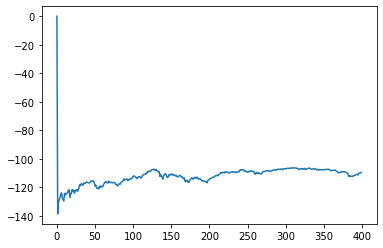

In [89]:
plt.plot(range(400), EIL*100)

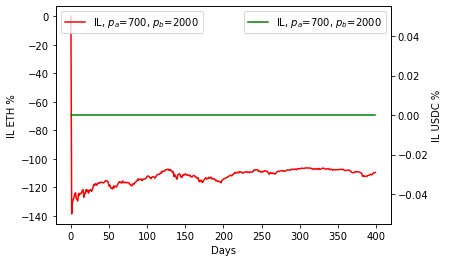

In [90]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
#plt.plot(t, P, label='P, m=%s, s=%s'%(round(m, 5), round(s, 5)))#,(round(pb, 3))
ax.plot(t, IL*100, label= 'IL, $p_a$=%s, $p_b$=%s'%(round(pa, 5),(round(pb, 5))) , color = 'r') #
ax1.plot(t, IL1*100, label= 'IL, $p_a$=%s, $p_b$=%s'%(pa1,pb1) , color = 'g')
#plt.plot(t, P2, label='P, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.plot(t, IL2, label='IL, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
ax.legend(loc = 'upper left')
ax1.legend(loc = 'upper right')
ax.set_ylabel('IL ETH %')
ax1.set_ylabel('IL USDC %')
ax.set_xlabel('Days')
plt.show()


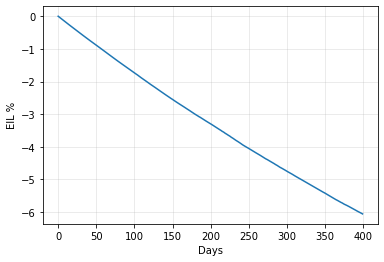

In [316]:
plt.plot(t, EIL*100*1.2)
#plt.plot(t, IL1*100)
plt.xlabel('Days')
plt.ylabel('EIL %')
plt.grid(alpha = 0.3)
#plt.savefig('eil7009000')

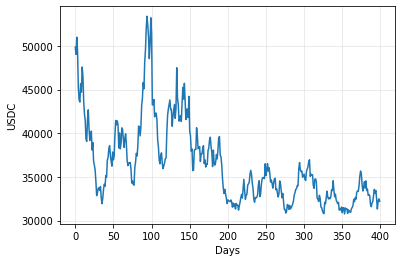

In [455]:
rrr = np.zeros(400)
flag = 0
lim = 100000
while flag == 0:

    q = np.random.normal(0, np.sqrt(1), 400)
    z = np.cumsum(q)*np.sqrt(1)
    for i in range(400):
        rrr[i] = St(0.1/400, 0.1, i, z[i])
    rrr = rrr*40000+40000
    if np.max(rrr) < lim: flag = 1
        


plt.plot(range(0, 400), rrr/1.5)
plt.xlabel('Days')
plt.ylabel('USDC')
#plt.legend()
plt.grid(alpha = 0.3)


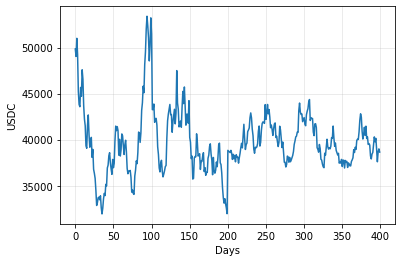

In [459]:
for i in range(200, 400):
    rrr[i]*=1.2

plt.plot(range(0, 400), rrr/1.5)
plt.xlabel('Days')
plt.ylabel('USDC')
#plt.legend()
plt.grid(alpha = 0.3)

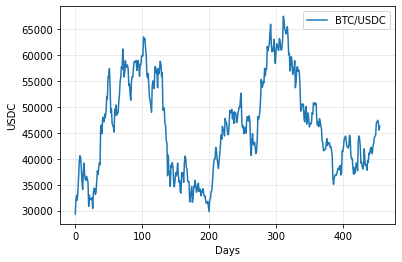

In [398]:
plt.plot(range(0, 456), price1, label = 'BTC/USDC')
plt.xlabel('Days')
plt.ylabel('USDC')
plt.legend()
plt.grid(alpha = 0.3)


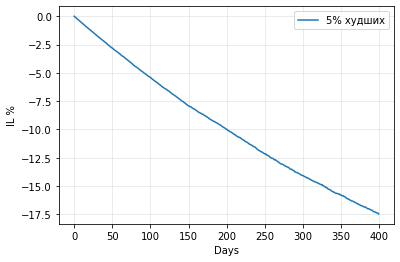

<Figure size 432x288 with 0 Axes>

In [317]:
kvantil_5 = np.zeros(400)
kvantil_95 = np.zeros(400)
for i in range(n):
    matr[i] = (np.sort(matr[i]))
    kvantil_5[i] = matr[i][int(iterations / 20)]
    kvantil_95[i] = matr[i][int(19*iterations / 20)]
plt.plot(t[:400], kvantil_5*100, label = '5% худших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('IL %')
plt.grid(alpha = 0.3)
plt.show()
plt.savefig('eil5worse')

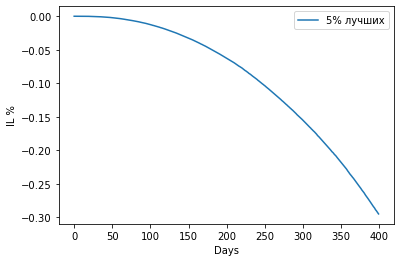

In [252]:
plt.plot(t, kvantil_95*100*2, label = '5% лучших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('IL %')
plt.show()

In [9]:
import scipy.stats as sts
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
1500 = p0
4/3p0

2/3

In [398]:
#fix vh
N=2 # кол-во валют
n=400 #кол-во транзакций/дней
iterations = 10000#кол-во итераций монте карло

#c = np.zeros(N)
xreal = 1000000 #принес LP
#позиция
pa = 1000
pb = 1600

#пересчет позиции в терминах с для позиции
#c[0] = np.sqrt(pa)
#c[1] = 1/(np.sqrt(pb))


#среднее и волатильность для GBM 
m = 0.1/n
s = 0.1

t = np.linspace(0, n-1, n)

ETotalProfit = np.zeros(n)
matr = np.zeros((n, iterations))

itcounter = 0
it = 0

for j in range(iterations):
    
    itcounter += it
    it = 0
    
    P = np.zeros(n)
    profit = np.zeros(n)
    #винеровский процесс и параметры для него 
    m1 = 0
    s1 = 1
    
    #моделируем цену с помощью GBM
    rrr = np.zeros(n)
    
    lim = 8000
    flag = 0
    random.seed(20)
    while flag == 0:
        q = np.random.normal(m1, np.sqrt(s1), n)
        z = np.cumsum(q)*np.sqrt(s1)
        for i in range(n):
            rrr[i] = St(m, s, i, z[i])+i/110
        rrr = rrr*1000+100
        if np.max(rrr) < lim: flag = 1
    
    P = rrr
    
    
    nor = sts.norm(P[0], 900)
    sample = nor.rvs(lim)
    Partpos = np.zeros(n)
    
    TLVpos = nor.cdf(pb)- nor.cdf(pa) #доля
    Partpos[0] = 350000000*TLVpos
    #IL для одной итерации и профит
    TotalProfit = np.zeros(n)
    TotalProfit[0] = 0
    
    if (P[0] < pb)&(P[0] > pa): 
        it +=1


    profit = np.zeros(n)
    profit[0] = 0
    
    
    for i in range(1,n):
        
        k = P[i]/P[0]
        
        profit[i] = profit[i-1] #прибыль от комиссий за прошлый день равна прибыли от комиссий за текущий день
        #если комиссий не получаем
        
        vh = (1+k)*xreal #портфель ходл по новой стоимости
        
        Partpos[i] = Partpos[i-1] #сколько ликвидности сосредоточено сегодня в позиции 
        #Не пересчитываем, если цена выходит из позиции
        flag1 = 0
        if (P[i] < pb)&(P[i] > pa): #если цена в позиции
            it += 1 #отслеживаем кол-во дней в позиции
            #flag1 = 1
            
            trr = 0
            if P[i] > 4000:
                trr = -100
            nor = sts.norm(P[i]+trr, 900) #генерим распределение ликвидности вокруг нее
        
            TLVpos = nor.cdf(pb)- nor.cdf(pa) #считаем долю средств в позиции от общих средств в пуле

            volumefees = random.randint(800000, 1000000) #количество комиссий ежедневно из данных биржи
            loked = random.randint(350000000, 400000000) #объем заблокированных во всем пуле долларов
            Partpos[i] = TLVpos*loked #объем ликвидности в долларах в позиции 
            PartLP = vh/Partpos[i] #доля провайдера ликвидности от доли в позиции
            fee = 0.003 #комиссии в пуле
            
            profit[i] += volumefees*PartLP #цена в позиции, значит получаем прибыль
        
        TotalProfit[i] = IL2_uni3(k,P[0],pa,pb, 0)*vh #IL от средств LP
        #if flag1 == 1:
            #TotalProfit[i] += profit[i]
        #else:
        TotalProfit[i] += profit[i]
        TotalProfit[i] /= 2*xreal
        
        #flag1 = 0
        matr[i][j] = TotalProfit[i]
    #plt.plot(range(0, n), rrr)
    #прибавляем к EIL IL за эту итерацию
    ETotalProfit += TotalProfit
    if j%100 == 0: print(j)
    #plt.xlabel('Days')
    #plt.ylabel('USDT')

ETotalProfit/=iterations
itcounter /= iterations
#plt.plot(t, P, label='P, m=%s, s=%s'%(round(m, 5), round(s, 5)))
#plt.plot(t, EIL, label='EIL')

#plt.plot(t, P2, label='P, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.plot(t, IL2, label='IL, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.legend()
#plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [399]:
itcounter

72.8152

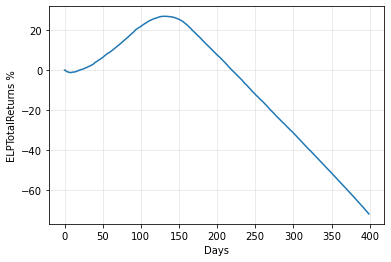

In [400]:
plt.plot(range(0, 400), ETotalProfit*100)
#plt.plot(t[:200], mm[:200]*100)
plt.xlabel('Days')
plt.ylabel('ELPTotalReturns %')
plt.grid(alpha = 0.3)
#plt.xlim(0, 400)
#plt.ylabel()
#plt.savefig('returns7002000')

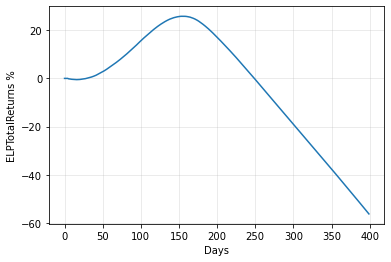

In [407]:
plt.plot(np.linspace(0, 399, 377), (mm[:377])*100)
#plt.plot(t[:200], mm[:200]*100)
plt.xlabel('Days')
plt.ylabel('ELPTotalReturns %')
plt.grid(alpha = 0.3)
#plt.xlim(0, 400)
#plt.ylabel()
#plt.savefig('returns7002000')

In [401]:
mm = np.zeros(400)
for i in range(0, 400):
    mm[i] = ETotalProfit[i]

In [402]:
for i in range(0, 400):
    if i < 5:
        m = 0
        r = i+1
        mm[i] = np.sum(mm[m:r])/(r-m)
    m = i-5
    r = i+1
    mm[i] = np.sum(mm[m:r])/(r-m)


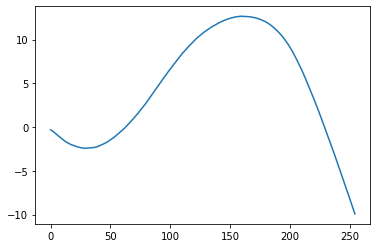

In [386]:
plt.plot(range(0, 255), (mm[5:260])*100)

In [149]:
mm[50]

-0.008708101986917216

In [105]:
ttt = np.zeros(50)

In [146]:

for i in range(400, 450):
    mm[i] = mm[i-1] + 0.0002 - i**2*0.0000000001

In [546]:
dtETR = ETotalProfit

In [548]:
dtETR[0] = dtETR[1]

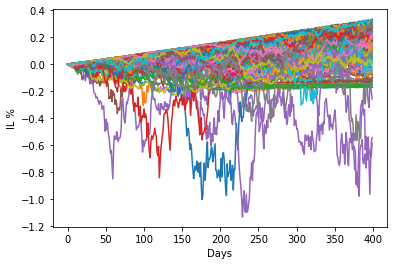

In [451]:
for i in range(iterations):
    plt.plot(t, matr.T[i])
    plt.xlabel('Days')
    plt.ylabel('IL %')
    
plt.show()


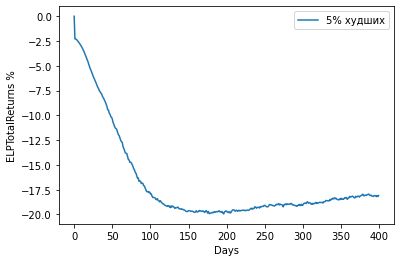

False


In [561]:
#matr(i, j) - matr(days, iteration)
kvantil_5 = np.zeros(n)
kvantil_95 = np.zeros(n)
for i in range(n):
    matr[i] = (np.sort(matr[i]))
    kvantil_5[i] = matr[i][int(iterations / 20)]
    kvantil_95[i] = matr[i][int(19*iterations / 20)]
plt.plot(t, kvantil_5*100, label = '5% худших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('ELPTotalReturns %')
plt.show()

print(kvantil_5[4]> kvantil_5[3])

In [610]:
kv = np.zeros(n)

for i in range(1, 400):
    summ = 0
    m = 20
    if i < m:
        summ = np.sum(kvantil_5[:i])
        kv[i] = summ/i
    
    elif i > 200: 
        summ = 0
        for j in range(i-20, i):
            summ += kvantil_5[j]
        kv[i] = summ/(20-1)
    else:
        summ = 0
        for j in range(i-m, i):
            summ += kvantil_5[j]
        kv[i] = summ/(m-1)


In [614]:

kk = abs(kv[399]-kv[200])/(399-200)

b = abs(kv[399] - kk*399)

a = kv[30]/30
for i in range(0, 30):
    kv[i] = a*i
 
for i in range(200, 400):
    kv[i] = kk*i - b

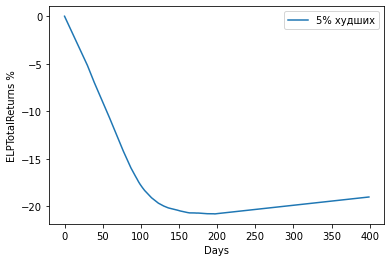

In [615]:
plt.plot(t, kv*100, label = '5% худших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('ELPTotalReturns %')
plt.show()

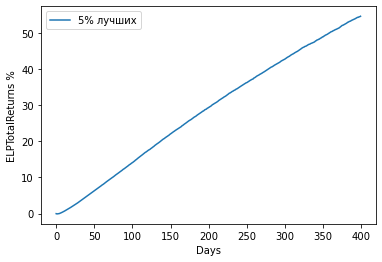

In [555]:
plt.plot(t, kvantil_95*100, label = '5% лучших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('ELPTotalReturns %')
plt.show()

In [63]:
print(v1[0], xreal[0], yreal[0], xvirt[0], yvirt[0], L)

3670110.1894827113 2226130.5992966583 638.3813453016073 4871881.910361249 2052.5949076747024 100000


In [53]:
rrr[1]/rrr[0]

1.052190861612284

In [66]:
import pandas as pd
df = pd.read_csv('ETHUSDBinance.csv')

In [67]:
df1 = pd.read_csv('BTCUSDBinance.csv')

In [68]:
df['Дата'].loc[0]

'01.04.2022'

In [69]:
n = df.shape[0]
d = np.zeros(n)
price = np.zeros(n)
for i in range(n):
    d[n - 1 - i] = float(str(df['Изм. %'].iloc[i].split('%')[0]).replace(',', '.'))
    price[n-i-1] = float((df['Цена'].iloc[i]).replace('.', '').replace(',', '.'))

In [70]:
n1 = df1.shape[0]
d1 = np.zeros(n1)
price1 = np.zeros(n1)
for i in range(n1):
    d1[n1 - 1 - i] = float(str(df1['Изм. %'].iloc[i].split('%')[0]).replace(',', '.'))
    price1[n1-i-1] = float((df1['Цена'].iloc[i]).replace('.', '').replace(',', '.'))

Text(0.5, 1.0, 'ETH/USDC')

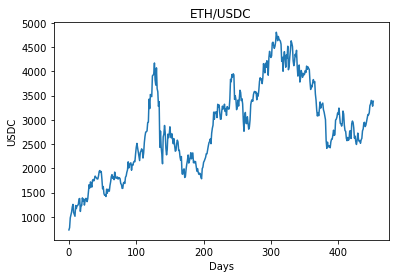

In [71]:
plt.plot(range(0, n), price)
plt.ylabel('USDC')
plt.xlabel('Days')
plt.title('ETH/USDC')
#plt.legend()

In [80]:
def IL2_uni3(k,P,pa,pb, r):

    '''
    d = (1 - np.sqrt(P/pb))*k + (1 - np.sqrt(pa/P))
    
    if P*k < pa:
        c = (np.sqrt(P/pa) - 1)*k - (1 - np.sqrt(pa/P))

    elif P*k > pb:
        c = (np.sqrt(pb/P) - 1) - k*(1-np.sqrt(P/pb)) - 1
    
    else:
        c = 2*np.sqrt(k)- k - 1
    return c/d - 1
    '''    
    d = (1-r)*(np.sqrt(P)*(np.sqrt(k) + 1/np.sqrt(k)) - (P*np.sqrt(k/pb) + np.sqrt(pa/k)))
    d*= np.sqrt(k)
    if k*P > pb:
        k1 = pb/P
        c = np.sqrt(P/k1)*(np.sqrt(pb/P) - r) - (1-r)*np.sqrt(pa/k1)
        c*= np.sqrt(k1)
    elif k*P < pa:
        k1 = pa/P
        c = k*(P*np.sqrt(k1/pa)*(1 - r*np.sqrt(pa/P)) - (1-r)*P*np.sqrt(k1/pb))
        c*= np.sqrt(k1)
    else:
        c = np.sqrt(P)*(2 - r - r*np.sqrt(k)*bool(k<1) - r*bool(k>=1)/np.sqrt(k))- (1-r)*(np.sqrt(pa/k) + P*np.sqrt(k/pb))
        c*= np.sqrt(k)
    return c/d - 1



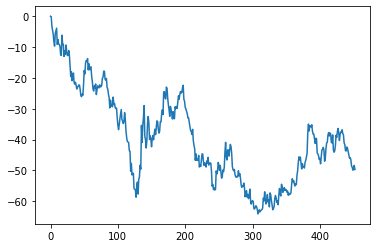

In [344]:
N = 2
n = df.shape[0]
pa = 700
pb = 4000

t = np.linspace(0, n-1, n)

IL = np.zeros(n)
IL[0] = 0
P = np.zeros(n)
P = price

for i in range(1, n):
    k = P[i]/P[0]
    IL[i] = IL2_uni3(k,P[0],pa,pb, 0)

plt.plot(range(n), IL*100)

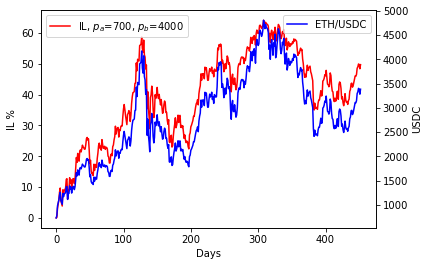

In [345]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
#plt.plot(t, P, label='P, m=%s, s=%s'%(round(m, 5), round(s, 5)))#,(round(pb, 3))
ax.plot(t, -IL*100, label= 'IL, $p_a$=%s, $p_b$=%s'%(round(pa, 5),(round(pb, 5))) , color = 'r') #
ax1.plot(t, price, label= 'ETH/USDC', color = 'b')
#plt.plot(t, P2, label='P, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.plot(t, IL2, label='IL, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
ax.legend(loc = 'upper left')
ax1.legend(loc = 'upper right')
ax.set_ylabel('IL %')
ax1.set_ylabel('USDC')
ax.set_xlabel('Days')
plt.show()

Text(0.5, 1.0, 'BTC/USDC')

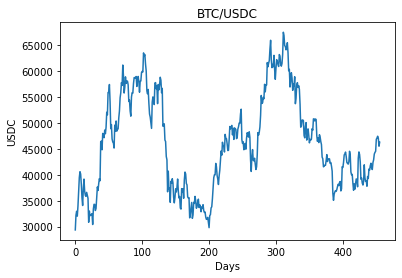

In [72]:
plt.plot(range(0, n1), price1)
plt.ylabel('USDC')
plt.xlabel('Days')
plt.title('BTC/USDC')
#plt.legend()

In [73]:
m1 = 0
s1 = 0.1
q = np.random.normal(m1, np.sqrt(s1), n)
z = np.cumsum(q)*np.sqrt(s1)

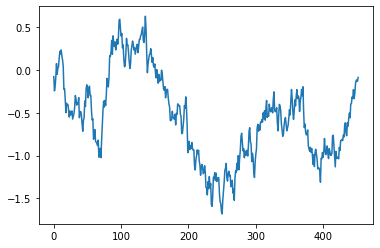

In [74]:
plt.plot(range(n), z)

# CIR #

In [29]:
import numpy as np

class CIR(object):
    def __init__(self, alpha, mu, sigma, r0, noise):
         self.alpha = alpha # mean-reverted speed
         self.mu = mu # mean-reverted level
         self.sigma = sigma # vol of interest rate
         self.r0 = r0 # initial interest rate
         self.noise = noise
        
    def Euler(self,t_init,t_end,dt, numbers):
        #np.random.seed(5)
        ts = np.arange(t_init, t_end, dt)
        dW = np.random.normal(loc=0.0, scale=self.noise*np.sqrt(dt),size = ts.size)
        r = []
        r.append(self.r0)
        for i in range(1, ts.size):
            if ((i == numbers[0]) |(i== numbers[1]) | (i == numbers[2])):
                dW[i-1] -= 0.8
            elif ((i == numbers[3]) |(i== numbers[4]) | (i == numbers[5])):
                dW[i-1] -= 0.8
                
            elif ((i == numbers[6]) |(i== numbers[7]) | (i == numbers[8])):
                dW[i-1] += 0.8
            elif ((i == numbers[9]) |(i== numbers[10]) | (i == numbers[11])):
                dW[i-1] += 0.8
            
            r.append(r[i-1] + self.alpha*(self.mu-r[i-1])*dt 
                     + self.sigma*np.sqrt(r[i-1])*dW[i-1])
        return r
    
    def Milstein(self,t_init,t_end,dt):
        #np.random.seed(5)
        ts = np.arange(t_init, t_end, dt)
        dW = np.random.normal(loc=0.0, scale=self.noise*np.sqrt(dt),size = ts.size)
        r = []
        r.append(self.r0)
        for i in range(1, ts.size):
            dw = dW[i-1]
            r.append(r[i-1] + self.alpha*(self.mu-r[i-1])*dt 
                     + self.sigma*np.sqrt(r[i-1])*dw + 
                     (self.sigma**2/2)*(dw**2 - dt))
        return r

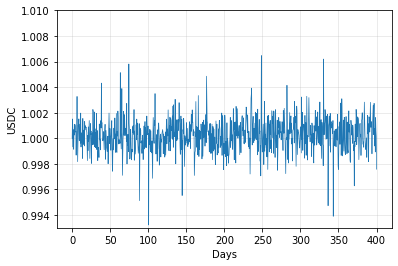

In [392]:
#from CIR import CIR # from the module CIR load our class-file CIR
import matplotlib.pyplot as plt
# assume mean-reverted speed = 1, mean-reverted level = 0.05, vol of interest rate = 0.05, initial interest rate = 0.05, and pass to an object named C 
#alpha, mu, sigma, r0
C = CIR(800,1.0002,0.007,1,5)
# For Euler method
r = C.Euler(0,1,0.001, numbers) # start time = 0, end time = 1, dt = 0.01
# For Milstern method
#r1 = C.Milstein(0,1,0.001)
# Plot and compare
#plt.figure(figsize=(20,10))
plt.plot(np.linspace(0, 400, 1000), r, linewidth = 0.7)
#l2,=plt.plot(r1,'b*',markersize=4)
plt.ylabel('USDC')
plt.xlabel('Days')
plt.ylim(0.993, 1.01)
plt.grid(alpha = 0.3)
#plt.legend()

In [333]:
import random 
random.uniform(0.007, 0.011) #немного шевелим волатильность
random.uniform(1. - 0.0009, 1. + 0.0009) #немного шевелим среднее

lst = list(np.arange(1, 400)) #создадим список длины 400 от 1 до 399
random.shuffle(lst) #перемешаем значения списка
numbers = ([random.choice(lst) for x in range(12)]) #выберем 12 случайных элементов, где будут выбросы
random.randint(900, 1100) #немного шевелим скорость сходимости к среднему


1055

In [652]:
N=2 # кол-во валют
n=1000 #кол-во транзакций/дней
iterations = 1000#кол-во итераций монте карло

c = np.zeros(N)
   
#позиция
pa = 0
pb = 100000000000

#пересчет позиции в терминах с для позиции
c[0] = np.sqrt(pa)
c[1] = 1/(np.sqrt(pb))

#массивы времени и МО непостоянных потерь
t = np.linspace(0, n-1, n)
StableEIL = np.zeros(n)
Stablematr = np.zeros((n, iterations))

for j in range(iterations):

    P = np.zeros(n)
    
    #моделируем цену с помощью CIR
    cir_price = np.zeros(n)
    
    alpha = random.randint(900, 1100) #немного шевелим скорость сходимости к среднему
    s = random.uniform(0.007, 0.011) #немного шевелим волатильность
    m = random.uniform(1. - 0.0009, 1. + 0.0009) #немного шевелим среднее

    lst = list(np.arange(1, 1000)) #создадим список длины 999 от 1 до 999
    random.shuffle(lst) #перемешаем значения списка
    numbers = ([random.choice(lst) for x in range(12)]) #выберем 12 случайных элементов, где будут выбросы
    #print(alpha, m, s, numbers)
    #alpha, mu, sigma, r0, noise
    C = CIR(alpha, m, s, m, 5)
    # For Euler method
    cir_price = C.Euler(0,1,0.001, numbers)
    
    P = cir_price

    #IL для одной итерации
    IL = np.zeros(n)
    IL[0] = 0
    
    for i in range(1,n):

        k = P[i]/P[0]

        IL[i] = IL2_uni3(k,P[0],pa,pb, 0)
        Stablematr[i][j] = IL[i]
        
    #plt.plot(range(0, n), cir_price)
    #прибавляем к EIL IL за эту итерацию
    StableEIL += IL
    #plt.xlabel('Days')
    #plt.ylabel('USDT')

StableEIL/=iterations


#plt.plot(t, StableEIL, label='EIL')
#plt.legend()
#plt.show()

In [653]:
#plt.plot(range(0, 1000),Stablematr.T[4])

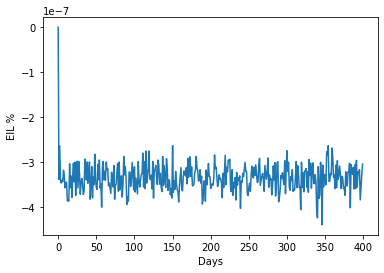

In [654]:
plt.plot(t[:400], StableEIL[:400])
plt.xlabel('Days')
plt.ylabel('EIL %')
#plt.legend()
plt.show()


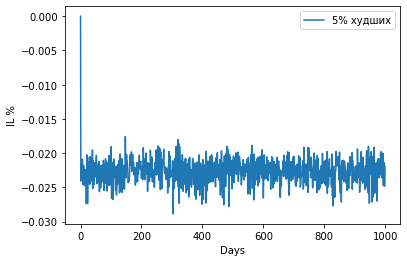

In [649]:
#matr(i, j) - matr(days, iteration)
Stablekvantil_5 = np.zeros(n)
Stablekvantil_95 = np.zeros(n)
for i in range(n):
    Stablematr[i] = (np.sort(Stablematr[i]))
    Stablekvantil_5[i] = Stablematr[i][int(iterations / 20)]
    Stablekvantil_95[i] = Stablematr[i][int(19*iterations / 20)]
plt.plot(t, Stablekvantil_5*100, label = '5% худших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('IL %')
plt.show()

In [650]:
for i in range(1, 400): Stablekvantil_5[i] = -0.022

Stablekvantil_5[0] = 0

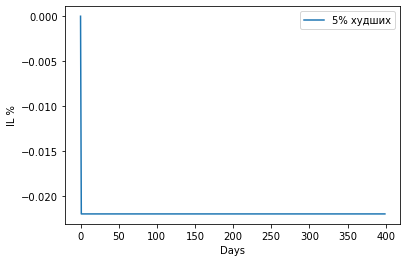

In [651]:
plt.plot(t[:400], Stablekvantil_5[:400], label = '5% худших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('IL %')
plt.show()

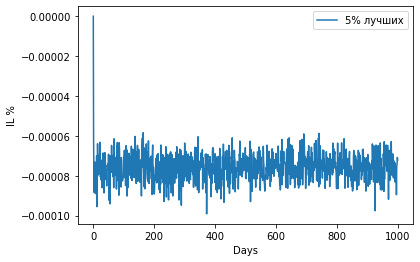

In [352]:
plt.plot(t, Stablekvantil_95*100, label = '5% лучших')
plt.xlabel('Days')
plt.legend()
plt.ylabel('IL %')
plt.show()

# Неклассическое определение IL #

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
#EthUSD price
N=2
n=453

c= np.zeros(N)
pa = 30000
pb = 50000

c[0]=np.sqrt(pa)
c[1]=np.sqrt(1/pb)

t = np.linspace(0, n-1, n)

xreal = np.zeros(n)
yreal = np.zeros(n)
xvirt = np.zeros(n)
yvirt = np.zeros(n)

P = price1

L = 10000
xvirt[0] = L*np.sqrt(P[0])
yvirt[0]= L/np.sqrt(P[0])

#L = np.sqrt(xvirt[0]*yvirt[0])

xreal[0]=xvirt[0]-L*c[0]
yreal[0] = yvirt[0]-L*c[1]


v1 = np.zeros(n)
v1[0] = xreal[0] + yreal[0]*P[0]
vheld = np.zeros(n)
vheld[0] = v1[0]

IL = np.zeros(n)
#IL[0] = v1[0]/vheld[0] - 1
IL[0] = 0

print(v1[0])

for i in range(1,n):
    
    xvirt[i] = L*np.sqrt(P[i])
    yvirt[i]=L/np.sqrt(P[i])


    if xvirt[i] < c[0]*L: 
        xvirt[i]=c[0]*L 
        yvirt[i]=L**2/xvirt[i]
        P[i] = xvirt[i]/yvirt[i]

    elif yvirt[i] < c[1]*L: 
        yvirt[i]=c[1]*L
        xvirt[i] = L**2/yvirt[i]
        P[i] = xvirt[i]/yvirt[i]

    xreal[i] = xvirt[i]-L*c[0]
    yreal[i] = yvirt[i]-L*c[1]

    v1[i]=xreal[i]+yreal[i]*P[i] #0.01*bool((xvirt[i] - xvirt[i-1])>=0)*(xvirt[i] - xvirt[i-1]) + 0.01*bool((yvirt[i] - yvirt[i-1])>=0)*(yvirt[i] - yvirt[i-1])
    #vheld[i] = xreal[i-1]+yreal[i-1]*P[i] 
    #vh = xreal[0] + P[0]*yreal[0]
    IL[i] = v1[i]/v1[0] - 1
    k = P[i]/P[0]

    


381880.7105809394


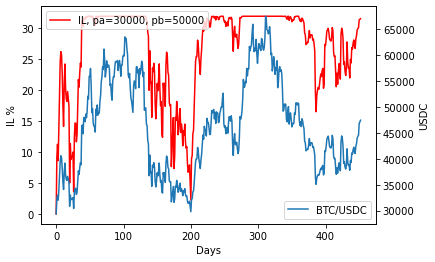

In [90]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
#plt.plot(t, P, label='P, m=%s, s=%s'%(round(m, 5), round(s, 5)))#,(round(pb, 3))
ax.plot(t, IL*100, label= 'IL, pa=%s, pb=%s'%(pa,(round(pb, 3))) , color = 'r') #,(round(pb, 3))
ax1.plot(range(0, n), price1[:453], label = 'BTC/USDC')
#plt.plot(t, P2, label='P, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
#plt.plot(t, IL2, label='IL, m=%s, s=%s'%(round(m2, 5), round(s2, 5)))
ax.legend(loc = 'upper left')
ax1.legend(loc = 'lower right')
ax.set_ylabel('IL %')
ax1.set_ylabel('USDC')
ax.set_xlabel('Days')
plt.show()

In [74]:
(v1[50]-v1[0])/v1[0]

1.0629892526849065

In [76]:
n1 = df1.shape[0]
d1 = np.zeros(n1)
price1 = np.zeros(n1)
for i in range(n1):
    d1[n1 - 1 - i] = float(str(df1['Изм. %'].iloc[i].split('%')[0]).replace(',', '.'))
    price1[n1-i-1] = float((df1['Цена'].iloc[i]).replace('.', '').replace(',', '.'))

In [77]:
n = df.shape[0]
d = np.zeros(n)
price = np.zeros(n)
for i in range(n):
    d[n - 1 - i] = float(str(df['Изм. %'].iloc[i].split('%')[0]).replace(',', '.'))
    price[n-i-1] = float((df['Цена'].iloc[i]).replace('.', '').replace(',', '.'))

In [68]:
v1[300]/v1[0]

2.213850860444915

# Classic IL #

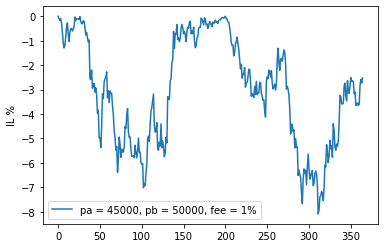

In [86]:
N=2
n=days

#C = CIR(1000,1.001,0.007,1,5)
# For Euler method
#r = C.Euler(0,n * 0.001,0.001) # start time = 0, end time = 1, dt = 0.01
# For Milstern method
#r1 = C.Milstein(0, 1, 0.001)


c= np.zeros(N)
pa = 45000
pb = 50000

c[0]=np.sqrt(pa)
c[1]=1/np.sqrt(pb)

t = np.linspace(0, n-1, n)

xreal = np.zeros(n)
yreal = np.zeros(n)
xvirt = np.zeros(n)
yvirt = np.zeros(n)

P = price1
L = 10000
xvirt[0] = L*np.sqrt(P[0])
yvirt[0]= L/np.sqrt(P[0])

#L = np.sqrt(xvirt[0]*yvirt[0])

xreal[0]=xvirt[0]-L*c[0]
yreal[0] = yvirt[0]-L*c[1]


v1 = np.zeros(n)
v1[0] = xreal[0] + yreal[0]*P[0]
vheld = np.zeros(n)
vheld[0] = v1[0]

IL = np.zeros(n)
IL[0] = v1[0]/vheld[0] - 1
IL1 = np.zeros(n)
IL1[0] = 0
for i in range(1,n):
    
    xvirt[i] = L*np.sqrt(P[i])
    yvirt[i]=L/np.sqrt(P[i])


    if xvirt[i] < c[0]*L: 
        #pass
        xvirt[i]=c[0]*L 
        yvirt[i]=L**2/xvirt[i]

    elif yvirt[i] < c[1]*L: 
        #pass
        yvirt[i]=c[1]*L
        xvirt[i] = L**2/yvirt[i]


    xreal[i] = xvirt[i]-L*c[0]
    yreal[i] = yvirt[i]-L*c[1]

    v1[i]=xreal[i]+yreal[i]*P[i] 
    vheld[i] = xreal[i-1]+yreal[i-1]*P[i]
    vh = xreal[0] + P[i]*yreal[0]
    IL[i] = v1[i]/vh - 1
    
    k = P[i]/P[0]
    #print(k)
    IL[i] = (2*np.sqrt(k)/(k+1))-1
    #IL[i] = IL2_uni3(k,P[0],pa,pb, 0.01)
    #IL1[i] = IL2_uni3(k,P[0],pa,pb, 0.)
#plt.plot(t, IL1*100, label = 'pa = %s, pb = %s, fee = %s'%(pa, round(pb, 3), 0))#pa, round(pb, 3), 
plt.plot(t, IL*100, label = 'pa = %s, pb = %s, fee = %s'%(pa, round(pb, 3), '1%'))
plt.ylabel('IL %')
plt.legend()
#%(pa, round(pb, 3))

In [31]:
def IL2_uni3ver0(k,P,pa,pb, rho, fee):
   
    
    k1 = k
    if k*P < pa:
        #c = np.sqrt(pa/P) - (1-rho)*(pa/P)*np.sqrt(P/pb) - rho*pa/P
        k = pa/P

    elif k*P > pb:
        #c = (2-rho)*np.sqrt(pb/P) - rho - (1-rho)*(pb/P)*np.sqrt(P/pb) - np.sqrt(pa/P)
        k = pb/P
    
    #elif (k*P>=pa)&(k*P <= pb):
    
    c = (2-rho)*np.sqrt(k)- (k*np.sqrt(P/pb) + np.sqrt(pa/P))*(1-rho) - rho*k*bool(k<1) - rho*bool(k>=1) + fee
    k = k1
    d = (k + 1 - k*np.sqrt(P/pb) - np.sqrt(pa/P))*(1-rho)
      
    return c/d - 1

# GBM #

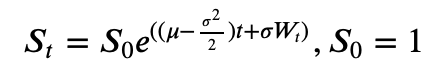

In [25]:
import math
def St(m, s, t, z):
    return math.exp((m -((s**2)/2))*t + s*z)

Text(0, 0.5, 'USDT')

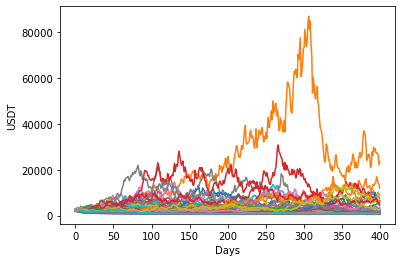

In [27]:
m=0.1/400
s=0.1
days = 400
for j in range(0, 100):
    t = np.linspace(0, days-1, days)
    m1 = 0
    s1 = 1
    rrr = np.zeros(days)
    q = np.random.normal(m1, np.sqrt(s1), np.size(t))
    z = np.cumsum(q)*np.sqrt(s1) 
    l=np.zeros(days)
    for i in range(days):
        #l[i] = price1[i]
        rrr[i] = St(m, s, i, z[i])
    #plt.plot(t, l)
    plt.plot(t, rrr*1600+700)
plt.xlabel('Days')
plt.ylabel('USDT')

In [38]:
m=0.005
s=0.1
days = 365
it = 1000
t = np.linspace(0, days-1, days)
m1 = 0
s1 = 1
matr = np.zeros((days, it))

pa = 0.7
pb = 1.5
c[0]=np.sqrt(pa)
c[1]=np.sqrt(1/pb)
L = 10000
x0 = L*np.sqrt(1) - L * c[0]
y0 = L/np.sqrt(1) - L * c[1]

kvantil_5 = np.zeros(days)
kvantil_95 = np.zeros(days)

C = CIR(60,1,0.025,1, 100)
# For Euler method
r = C.Euler(0,0.365,0.001, [1, 3, 5, 7, 9, 12, 14, 16, 38, 47, 58, 60]) 

Text(0.5, 1.0, 'ETH/USDC GBM')

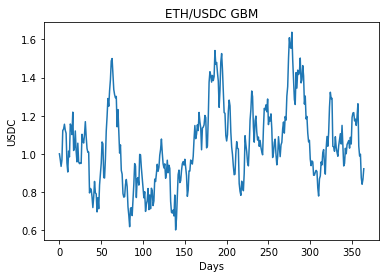

In [39]:
plt.plot(t, r)
plt.ylabel('USDC')
plt.xlabel('Days')
#plt.legend()
plt.title('ETH/USDC GBM')

In [41]:
for j in range(it):
    C = CIR(60,1,0.025,1, 100)
    # For Euler method
    r = C.Euler(0,0.365,0.001, [1, 3, 5, 7, 9, 12, 14, 16, 38, 47, 58, 60]) 
    #q = np.random.normal(m1, np.sqrt(s1), days)
    #z = np.cumsum(q)*np.sqrt(s1)
    for i in range(days):
        #price1 = St(m, s, i, z[i])
        price1 = r[i]
        
        xv = L*np.sqrt(price1)
        yv = L/np.sqrt(price1)

        if xv < c[0]*L: 
            xv=c[0]*L 
            yv=L**2/xv

        elif yv < c[1]*L: 
            yv=c[1]*L
            xv = L**2/yv

        xr = xv-L*c[0]
        yr = yv-L*c[1]

        v1=xr+yr*price1
        vheld = x0+y0*price1
        matr[i][j] = v1/vheld - 1
        

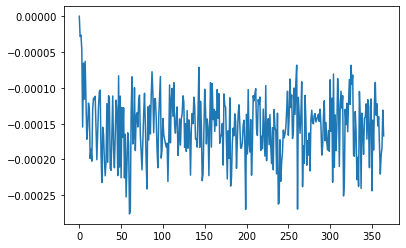

In [43]:

kvantil_5 = np.zeros(n)
kvantil_95 = np.zeros(n)
for i in range(n):
    matr[i] = (np.sort(matr[i]))
    kvantil_5[i] = matr[i][int(it / 20)]
    kvantil_95[i] = matr[i][int(19*it / 20)]
plt.plot(t, kvantil_95)
#plt.legend()
plt.show()

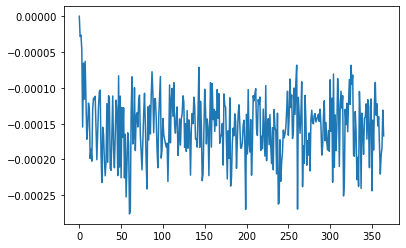

In [45]:
#plt.plot(t, kvantil_5, label = '5%')
plt.plot(t, kvantil_95)
#plt.legend()
plt.show()

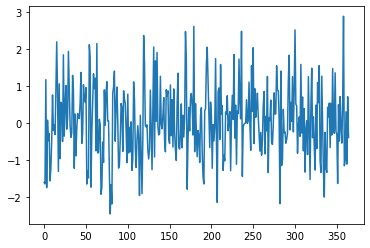

In [46]:
dW = np.random.normal(loc=0.0, scale=1,size = days)
plt.plot(t, dW)

In [47]:
#i < j
#P'xixj = kPxixj, i < j

def IL_v3_fee_from3(r, xreal, n, c, P, k, i, j):

    
    if (((xreal[j] + L*c[j])/np.sqrt(k)) - L*c[j]) < 0:
        xnewi = ((xreal[i] + L*c[i])*(xreal[j] + L*c[j])/(c[j]*L))
        oldP = (xreal[i] + L*c[i])/(xreal[j] + L*c[j])
        newP = xnewi/(c[j]*L)
        k = newP/oldP
    elif (((xreal[i] + L*c[i])*np.sqrt(k)) - L*c[i]) < 0:
        xnewj = ((xreal[i] + L*c[i])*(xreal[j] + L*c[j])/(c[i]*L))
        oldP = (xreal[i] + L*c[i])/(xreal[j] + L*c[j])
        newP = c[i]*L/xnewj
        k = newP/oldP
    
    a = (2 - r)*np.sqrt(k) - (k+1) + r*k*bool(k < 1) + r*bool(k>=1) #числитель
    
    C = 1
    for l in range(n):
         if(l!=i)&(l!=j):
                C*=c[l]
    
    p = 1 #для корня н-ной степени в знаменателе
    b = P[j]*c[j]*k + P[i]*c[i] #для числителя дроби в знаменателе
    
    for l in range(n):
        p *= P[l]
        if(l!=i)&(l!=j):
            b += P[l]*c[l]*np.sqrt(k)
    b /= pow(p, (1/n))
    #досчитываем весь знаменатель IL
    b = ((n-2)*np.sqrt(k) + k + 1 - b)
    b *= (1-r)
    
    return a/b

In [48]:
import random
from random import randrange
num = 100
s = []
p = 1./3
for i in range(0,num):
    s += random.choices([1, 2, 0], weights=[0.5, 0.1, 1-0.6])

In [49]:
xreal = np.zeros(num)
yreal = np.zeros(num)
zreal = np.zeros(num)
xvirt = np.zeros(num)
yvirt = np.zeros(num)
zvirt = np.zeros(num)
Pxy = np.zeros(num)
Pxz = np.zeros(num)
Pyz = np.zeros(num)
V1 = np.zeros(num)
Vh = np.zeros(num)
IL = np.zeros(num)
IL_formula = np.zeros(num)
IL_swap_to_swap = np.zeros(num)
Vh_swap_to_swap = np.zeros(num)
k = np.zeros(num)
k_swap_to_swap = np.zeros(num)

c = np.zeros(3)
c[0] = 0.5
c[1] = 0.5
c[2] = 0.5
L = 1000

xreal[0] = L*(1 - c[0])
yreal[0] = L*(1 - c[1])
zreal[0] = L*(1 - c[2])
xvirt[0] = xreal[0] +L*c[0]
yvirt[0] = yreal[0] +L*c[1]
zvirt[0] = zreal[0] +L*c[2]
Pxy[0] = xvirt[0]/yvirt[0]
Pxz[0] = xvirt[0]/zvirt[0]
Pyz[0] = yvirt[0]/zvirt[0]

IL[0] = 0
V1[0] = xreal[0] + Pxy[0]*yreal[0] + Pxz[0]*zreal[0]
Vh[0] = V1[0]
Vh_swap_to_swap[0] = V1[0]
IL_formula[0]= 0
k[0] = 1
IL_swap_to_swap[0] = 0
k_swap_to_swap[0] = 1

In [50]:
delta  = np.random.uniform(-700, 500, num)

Swap to swap IL

In [51]:
for i in range(1, num):
    
    if s[i] == 0: #y for z
        if delta[i] >= 0:
            yvirt[i] = yvirt[i-1] + delta[i]
            zvirt[i] = yvirt[i-1]*zvirt[i-1]/yvirt[i]
            yreal[i] = yvirt[i] - L*c[1]
            zreal[i] = zvirt[i] - L*c[2]
            if zreal[i] <0:
                zreal[i] = 0
                zvirt[i] = L*c[2]
                yvirt[i] = yvirt[i-1]*zvirt[i-1]/zvirt[i]
                yreal[i] = yvirt[i] - L*c[1]

        elif delta[i] < 0:
            zvirt[i] = zvirt[i-1] - delta[i]
            yvirt[i] = yvirt[i-1]*zvirt[i-1]/zvirt[i]
            zreal[i] = zvirt[i] - L*c[2]
            yreal[i] = yvirt[i] - L*c[1]
            if yreal[i] <0:
                yreal[i] = 0
                yvirt[i] = L*c[1]
                zvirt[i] = zvirt[i-1]*yvirt[i-1]/yvirt[i]
                zreal[i] = zvirt[i] - L*c[2]

        xreal[i] = xreal[i-1]
        xvirt[i] = xvirt[i-1]
        
    if s[i] == 1:
        if delta[i] >= 0:
            xvirt[i] = xvirt[i-1] + delta[i]
            zvirt[i] = xvirt[i-1]*zvirt[i-1]/xvirt[i]
            xreal[i] = xvirt[i] - L*c[0]
            zreal[i] = zvirt[i] - L*c[2]
            if zreal[i] <0:
                zreal[i] = 0
                zvirt[i] = L*c[2]
                xvirt[i] = xvirt[i-1]*zvirt[i-1]/zvirt[i]
                xreal[i] = xvirt[i] - L*c[0]

        elif delta[i] < 0:
            zvirt[i] = zvirt[i-1] - delta[i]
            xvirt[i] = xvirt[i-1]*zvirt[i-1]/zvirt[i]
            zreal[i] = zvirt[i] - L*c[2]
            xreal[i] = xvirt[i] - L*c[0]
            if xreal[i] <0:
                xreal[i] = 0
                xvirt[i] = L*c[0]
                zvirt[i] = zvirt[i-1]*xvirt[i-1]/xvirt[i]
                zreal[i] = zvirt[i] - L*c[2] 
                
        yreal[i] = yreal[i-1]
        yvirt[i] = yvirt[i-1]
        
    if s[i] == 2:
        if delta[i] >= 0:
            xvirt[i] = xvirt[i-1] + delta[i]
            yvirt[i] = xvirt[i-1]*yvirt[i-1]/xvirt[i]
            xreal[i] = xvirt[i] - L*c[0]
            yreal[i] = yvirt[i] - L*c[1]
            if yreal[i] <0:
                yreal[i] = 0
                yvirt[i] = L*c[1]
                xvirt[i] = xvirt[i-1]*yvirt[i-1]/yvirt[i]
                xreal[i] = xvirt[i] - L*c[0]
        elif delta[i] < 0:
            yvirt[i] = yvirt[i-1] - delta[i]
            xvirt[i] = xvirt[i-1]*yvirt[i-1]/yvirt[i]
            yreal[i] = yvirt[i] - L*c[1]
            xreal[i] = xvirt[i] - L*c[0]
            if xreal[i] <0:
                xreal[i] = 0
                xvirt[i] = L*c[0]
                yvirt[i] = yvirt[i-1]*xvirt[i-1]/xvirt[i]
                yreal[i] = yvirt[i] - L*c[1] 
        zreal[i] = zreal[i-1]
        zvirt[i] = zvirt[i-1]
                
    Pxy[i] = xvirt[i]/yvirt[i]
    Pxz[i] = xvirt[i]/zvirt[i]
    Pyz[i] = yvirt[i]/zvirt[i]
    k_swap_to_swap[i] = bool(s[i] == 0)*Pyz[i]/Pyz[i-1] + bool(s[i] == 1)*Pxz[i]/Pxz[i-1] + bool(s[i] == 2)*Pxy[i]/Pxy[i-1]
    V1[i] = xreal[i] + Pxy[i]*yreal[i] + Pxz[i]*zreal[i]
    Vh_swap_to_swap[i] = xreal[i-1] + Pxy[i]*yreal[i-1] + Pxz[i]*zreal[i-1]
    IL_swap_to_swap[i] = V1[i]/Vh_swap_to_swap[i] - 1
    #Vh[i] = xreal[0] + Pxy[i]*yreal[0] + Pxz[i]*zreal[0]
    #IL[i] = V1[i]/Vh[i] - 1
    #k[i] = bool(s[i] == 0)*Pyz[i]/Pyz[0] + bool(s[i] == 1)*Pxz[i]/Pxz[0] + bool(s[i] == 2)*Pxy[i]/Pxy[0]
    if s[i] == 0: IL_formula[i] = IL_v3_fee_from3(0, np.array([xreal[i-1], yreal[i-1], zreal[i-1]]), 3, c, np.array([1., Pxy[i-1], Pxz[i-1]]), k_swap_to_swap[i], 1, 2)
    elif s[i] == 1: IL_formula[i] = IL_v3_fee_from3(0, np.array([xreal[i-1], yreal[i-1], zreal[i-1]]), 3, c, np.array([1., Pxy[i-1], Pxz[i-1]]), k_swap_to_swap[i], 0, 2)
    else: IL_formula[i] = IL_v3_fee_from3(0, np.array([xreal[i-1], yreal[i-1], zreal[i-1]]), 3, c, np.array([1., Pxy[i-1], Pxz[i-1]]), k_swap_to_swap[i], 0, 1)

In [52]:
df = pd.DataFrame({'Type': s, 'Delta': delta, 'Xvirt': xvirt, 'Yvirt': yvirt, 'Zvirt': zvirt, 'Xreal': xreal, 'Yreal': yreal, 'Zreal': zreal, 'Pxy':Pxy, 'Pxz': Pxz, 'Pyz': Pyz, 'V1': V1, 'Vh_swap_to_swap': Vh_swap_to_swap, 'IL_swap_to_swap': IL_swap_to_swap, 'IL_formula': IL_formula})

In [53]:
df = df[(abs(df['IL_swap_to_swap']) > 0.00000001)|(df['IL_swap_to_swap'].index == 0)].reset_index()

In [54]:
sz = df.shape[0]

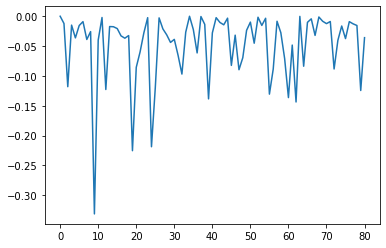

In [55]:
plt.plot(range(0, sz), df['IL_swap_to_swap'])

Формула для uni v3 +

Моделирование курсов +

Ожидаемый IL +

Ожидаемая доходность 

Среднее проскальзывание

Комиссии !!!

In [56]:
n = 3
num = 365
xreal = np.zeros(num)
yreal = np.zeros(num)
zreal = np.zeros(num)
xvirt = np.zeros(num)
yvirt = np.zeros(num)
zvirt = np.zeros(num)
Pxy = np.zeros(num)
Pxz = np.zeros(num)
Pyz = np.zeros(num)
V1 = np.zeros(num)
Vh = np.zeros(num)
IL = np.zeros(num)
IL_formula = np.zeros(num)

k = np.zeros(num)

c = np.zeros(3)
c[0] = 0.5
c[1] = 0.5
c[2] = 0.5
L = 1000

xreal[0] = L*(1 - c[0])
yreal[0] = L*(1 - c[1])
zreal[0] = L*(1 - c[2])
xvirt[0] = xreal[0] +L*c[0]
yvirt[0] = yreal[0] +L*c[1]
zvirt[0] = zreal[0] +L*c[2]
Pxy[0] = xvirt[0]/yvirt[0]
Pxz[0] = xvirt[0]/zvirt[0]
Pyz[0] = yvirt[0]/zvirt[0]

IL[0] = 0
V1[0] = xreal[0] + Pxy[0]*yreal[0] + Pxz[0]*zreal[0]
Vh[0] = V1[0]
IL_formula[0]= 0
k[0] = 1


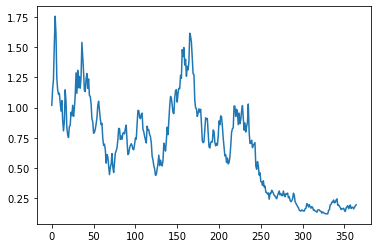

In [57]:
m=0.005
s=0.1
days = num
t = np.linspace(0, days-1, days)
m1 = 0
s1 = 1
q = np.random.normal(m1, np.sqrt(s1), np.size(t))
z = np.cumsum(q)*np.sqrt(s1)
l=np.zeros(days)
for i in range(days):
    l[i] = St(m, s, t[i], z[i])
plt.plot(t, l)

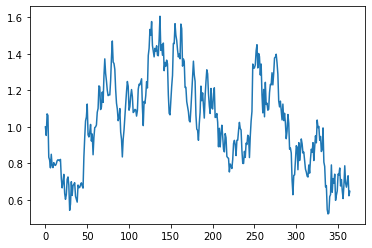

In [58]:
C = CIR(60,1,0.025,1, 100)
# For Euler method
r = C.Euler(0,0.365,0.001, [1, 3, 5, 7, 9, 12, 14, 16, 38, 47, 58, 60])
plt.plot(range(365), r)

In [59]:
ss = []
p = 1./3
for i in range(0,num):
    ss += random.choices([1, 2, 0], weights=[0.5, 0.1, 1-0.6])

In [60]:
#как тут по цене лучше понимать кол-во?
for i in range(1, num):
    
    Pxy[i] = l[i]
    Pxz[i] = r[i]
    Pyz[i] = Pxz[i]/Pxy[i]
    
    if ss[i] == 0: #y for z
        k[i] = Pyz[i]/Pyz[0]
        yvirt[i] = yvirt[0]*np.sqrt(k[i])
        zvirt[i] = yvirt[0]*zvirt[0]/yvirt[i]
        yreal[i] = yvirt[i] - L*c[1]
        zreal[i] = zvirt[i] - L*c[2]
        if (k[i] >= 1)&(zreal[i] <0):
            zreal[i] = 0
            zvirt[i] = L*c[2]
            yvirt[i] = yvirt[0]*zvirt[0]/zvirt[i]
            yreal[i] = yvirt[i] - L*c[1]
            k[i] = yvirt[i]/zvirt[i]
            k[i] /= Pyz[0]

        elif (k[i] < 1)&(yreal[i] <0):
            yreal[i] = 0
            yvirt[i] = L*c[1]
            zvirt[i] = zvirt[0]*yvirt[0]/yvirt[i]
            zreal[i] = zvirt[i] - L*c[2]
            k[i] = yvirt[i]/zvirt[i]
            k[i]/=Pyz[0]

        xreal[i] = xreal[0]
        xvirt[i] = xvirt[0]
        Pxy[i] = xvirt[i]/yvirt[i]
        Pxz[i] = xvirt[i]/zvirt[i]
        
    if ss[i] == 1:
        k[i] = Pxz[i]/Pxz[0]
        xvirt[i] = xvirt[0]*np.sqrt(k[i])
        zvirt[i] = xvirt[0]*zvirt[0]/xvirt[i]
        xreal[i] = xvirt[i] - L*c[0]
        zreal[i] = zvirt[i] - L*c[2]
        if (k[i] >= 1)&(zreal[i] <0):
            zreal[i] = 0
            zvirt[i] = L*c[2]
            xvirt[i] = xvirt[0]*zvirt[0]/zvirt[i]
            xreal[i] = xvirt[i] - L*c[0]
            k[i] = xvirt[i]/zvirt[i]
            k[i]/=Pxz[0]
        elif (k[i] < 1)&(xreal[i] <0):
            xreal[i] = 0
            xvirt[i] = L*c[0]
            zvirt[i] = zvirt[0]*xvirt[0]/xvirt[i]
            zreal[i] = zvirt[i] - L*c[2] 
            k[i] = xvirt[i]/zvirt[i]
            k[i]/=Pxz[0]
                
        yreal[i] = yreal[0]
        yvirt[i] = yvirt[0]
        Pxy[i] = xvirt[i]/yvirt[i]
        
    if ss[i] == 2:
        k[i] = Pxy[i]/Pxy[0]
        xvirt[i] = xvirt[0]*np.sqrt(k[i])
        yvirt[i] = xvirt[0]*yvirt[0]/xvirt[i]
        xreal[i] = xvirt[i] - L*c[0]
        yreal[i] = yvirt[i] - L*c[1]
        if (k[i] >= 1)&(yreal[i] <0):
            yreal[i] = 0
            yvirt[i] = L*c[1]
            xvirt[i] = xvirt[0]*yvirt[0]/yvirt[i]
            xreal[i] = xvirt[i] - L*c[0]
            k[i] = xvirt[i]/yvirt[i]
            k[i]/=Pxy[0]
        elif (k[i] < 1)&(xreal[i] <0):
            xreal[i] = 0
            xvirt[i] = L*c[0]
            yvirt[i] = yvirt[0]*xvirt[0]/xvirt[i]
            yreal[i] = yvirt[i] - L*c[1] 
            k[i] = xvirt[i]/yvirt[i]
            k[i]/=Pxy[0]
        zreal[i] = zreal[0]
        zvirt[i] = zvirt[0]
        Pxz[i] = xvirt[i]/zvirt[i]
        
    V1[i] = xreal[i] + Pxy[i]*yreal[i] + Pxz[i]*zreal[i]
    Vh[i] = xreal[0] + Pxy[i]*yreal[0] + Pxz[i]*zreal[0]
    IL[i] = V1[i]/Vh[i] - 1
    #k[i] = bool(ss[i] == 0)*Pyz[i]/Pyz[0] + bool(ss[i] == 1)*Pxz[i]/Pxz[0] + bool(ss[i] == 2)*Pxy[i]/Pxy[0]
    if ss[i] == 0: IL_formula[i] = IL_v3_fee_from3(0, np.array([xreal[0], yreal[0], zreal[0]]), 3, c, np.array([1., Pxy[0], Pxz[0]]), k[i], 1, 2)
    elif ss[i] == 1: IL_formula[i] = IL_v3_fee_from3(0, np.array([xreal[0], yreal[0], zreal[0]]), 3, c, np.array([1., Pxy[0], Pxz[0]]), k[i], 0, 2)
    elif ss[i] == 2: IL_formula[i] = IL_v3_fee_from3(0, np.array([xreal[0], yreal[0], zreal[0]]), 3, c, np.array([1., Pxy[0], Pxz[0]]), k[i], 0, 1)

In [61]:
df = pd.DataFrame({'Type': ss, 'Xvirt': xvirt, 'Yvirt': yvirt, 'Zvirt': zvirt, 'Xreal': xreal, 'Yreal': yreal, 'Zreal': zreal, 'Pxy':Pxy, 'Pxz': Pxz, 'Pyz': Pyz, 'V1': V1, 'Vh': Vh, 'IL': IL, 'IL_formula': IL_formula})

In [62]:
df.head(50)

,Type,Xvirt,Yvirt,Zvirt,Xreal,Yreal,Zreal,Pxy,Pxz,Pyz,V1,Vh,IL,IL_formula
0,0,1000.000000,1000.000000,1000.000000,500.000000,500.000000,500.000000,1.000000,1.000000,1.000000,1500.000000,1500.000000,0.000000,0.000000
1,1,976.464296,1000.000000,1024.102985,476.464296,500.000000,524.102985,0.976464,0.953483,0.826915,1464.419480,1464.973409,-0.000378,-0.000378
2,2,1109.456655,901.342108,1000.000000,609.456655,401.342108,500.000000,1.230894,1.109457,0.870471,1658.194602,1670.175362,-0.007173,-0.007173
3,1,1031.012761,1000.000000,969.920100,531.012761,500.000000,469.920100,1.031013,1.062987,0.699486,1546.038245,1547.000037,-0.000622,-0.000622
4,1,913.477274,1000.000000,1094.717984,413.477274,500.000000,594.717984,0.913477,0.834441,0.474759,1366.472820,1373.959002,-0.005449,-0.005449
5,1,905.097906,1000.000000,1104.852849,405.097906,500.000000,604.852849,0.905098,0.819202,0.507911,1353.143656,1362.150063,-0.006612,-0.006612
6,1,880.960313,1000.000000,1135.124915,380.960313,500.000000,635.124915,0.880960,0.776091,0.622719,1314.355246,1328.525693,-0.010666,-0.010666
7,2,1071.591507,933.191420,1000.000000,571.591507,433.191420,500.000000,1.148308,1.071592,0.740459,1604.824588,1609.949932,-0.003184,-0.003184
8,1,888.075279,1000.000000,1126.030668,388.075279,500.000000,626.030668,0.888075,0.788678,0.710211,1325.849348,1338.376491,-0.009360,-0.009360
9,1,881.654369,1000.000000,1134.231321,381.654369,500.000000,634.231321,0.881654,0.777314,0.694758,1315.478710,1329.484398,-0.010535,-0.010535
